In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df_base_oc_2 = pd.read_csv("../data/31e26.csv", header=None)
df_mixup_oc_2 = pd.read_csv("../data/60492.csv", header=None)

df_base_oc_1 = pd.read_csv("../data/0c226.csv", header=None)
df_mixup_oc_1 = pd.read_csv("../data/8e561.csv", header=None)

df_base_oc_3 = pd.read_csv("../data/92197.csv", header=None)
df_mixup_oc_3 = pd.read_csv("../data/0b297.csv", header=None)


In [53]:
df_base_oc_1

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,32,61,6,57,57,82,96,51,96,96,...,32,32,32,32,96,32,32,96,32,32
1,75,61,21,31,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
2,77,61,42,18,33,79,74,51,51,51,...,51,77,77,77,77,77,51,77,77,77
3,8,61,91,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,0,61,44,94,23,67,65,0,23,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,11,61,98,35,11,46,46,46,46,46,...,46,46,46,11,46,46,46,46,46,46
1020,86,61,24,9,28,9,9,41,40,28,...,86,9,86,86,9,86,86,86,86,86
1021,75,61,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
1022,5,61,69,61,28,87,87,87,5,5,...,5,5,5,5,5,5,5,5,5,5


In [54]:
def func(df):
    index = []
    for i, row in df.iterrows():
        arr_row = row.to_numpy()
        idx = np.where(arr_row[:-1] != arr_row[1:])[0]
        if idx != []:   
            tmp_idx = np.where(arr_row[:-1] != arr_row[1:])[0][-1]
            if arr_row[tmp_idx+1] == arr_row[0]:
                index.append(np.where(arr_row[:-1] != arr_row[1:])[0][-1])
            else:
                index.append(200)
        else:
            index.append(200)

    return index


In [55]:

base_idx_oc_1 = func(df_base_oc_1)
mixup_idx_oc_1 = func(df_mixup_oc_1)
base_idx_oc_2 = func(df_base_oc_2)
mixup_idx_oc_2 = func(df_mixup_oc_2)
base_idx_oc_3 = func(df_base_oc_3)
mixup_idx_oc_3 = func(df_mixup_oc_3)

/home/phelm/anaconda3/envs/master-base/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


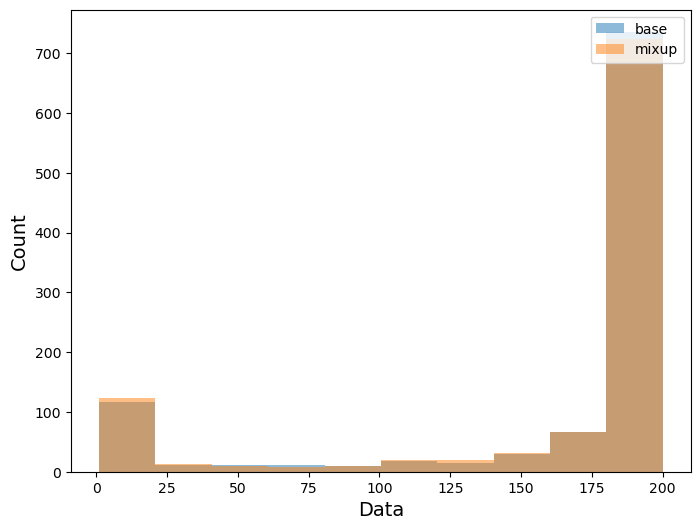

In [56]:
plt.figure(figsize=(8,6))
plt.hist(base_idx_oc_1, bins=10, alpha=0.5, label="base")
plt.hist(mixup_idx_oc_1, bins=10, alpha=0.5, label="mixup")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.savefig("test_c100_2.png")

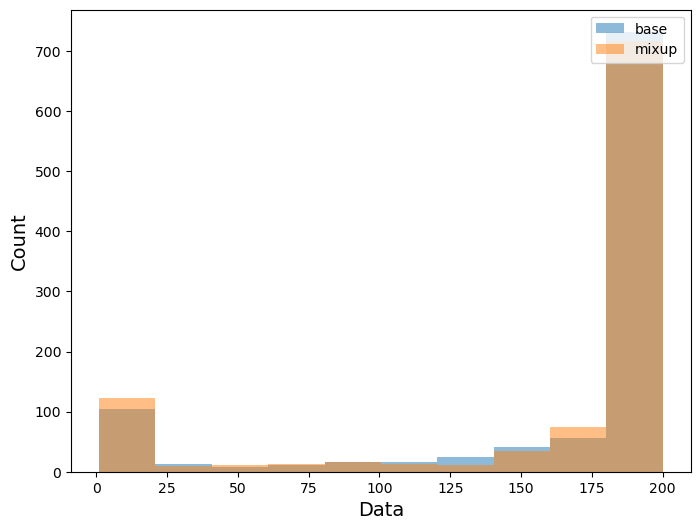

In [57]:
plt.figure(figsize=(8,6))
plt.hist(base_idx_oc_3, bins=10, alpha=0.5, label="base")
plt.hist(mixup_idx_oc_3, bins=10, alpha=0.5, label="mixup")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.savefig("test_c100_3.png")

In [67]:
base_mean = [(a+b+c)/3 for a, b, c in zip(base_idx_oc_1, base_idx_oc_2, base_idx_oc_3)]
mixup_mean = [(a+b+c)/3 for a, b, c in zip(mixup_idx_oc_1, mixup_idx_oc_2, mixup_idx_oc_3)]

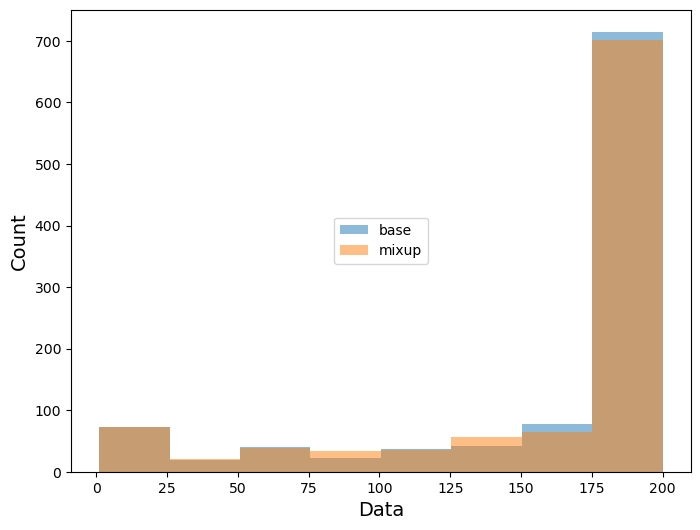

In [74]:
plt.figure(figsize=(8,6))
plt.hist(base_mean, bins=8, alpha=0.5, label="base")
plt.hist(mixup_mean, bins=8, alpha=0.5, label="mixup")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='center')
plt.savefig("test_mean_c100.png")

Next steps:
    * better model for c100
    * NLP exp
    * TSNE for learned representation
    * 